In [1]:
# Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [2]:
# Read input dataset
df = pd.read_csv("CCPP_data.csv")
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


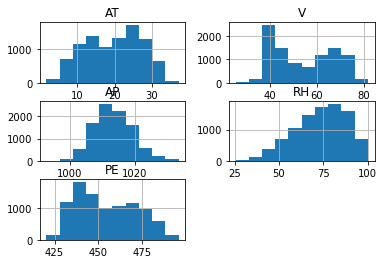

In [3]:
# Check features and output characteristics
pdf = df[['AT','V','AP','RH','PE']]
pdf.hist()
plt.show()

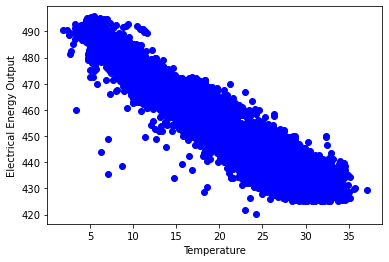

In [4]:
# Show linear association between Temperature and Output
plt.scatter(pdf.AT, pdf.PE, color='blue')
plt.xlabel("Temperature")
plt.ylabel("Electrical Energy Output")
plt.show()

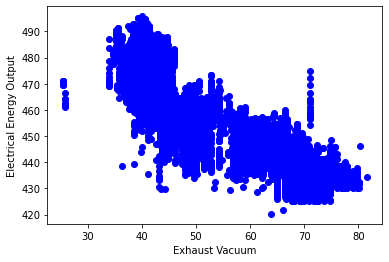

In [5]:
# Show linear association between Vacuum and Output
plt.scatter(pdf.V, pdf.PE, color='blue')
plt.xlabel("Exhaust Vacuum")
plt.ylabel("Electrical Energy Output")
plt.show()

In [6]:
# Use Multiple Linear Regression for neural network with 80/20 train test split
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
X = pdf[['AT','V']]
y = np.ravel(pdf[['PE']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
regr = MLPRegressor(max_iter=500).fit(X_train, y_train)

In [7]:
# Print simple prediction score
regr.predict(X_test)
print('Variance Score: %.2f' % regr.score(X_test, y_test))

Variance Score: 0.93


In [8]:
# Use cross validattion for prediction
from sklearn.model_selection import cross_val_score
crg = MLPRegressor(max_iter=500).fit(X,y)
scores = cross_val_score(crg, X, y, cv=5)
scores

array([0.92543737, 0.92479738, 0.92619253, 0.92739065, 0.91820421])